### Script de preparação de dados do Trabalho de Conclusão
#### Curso de Especialização Lato Sensu em Ciência de Dados e Big Data
#### Instituição Pontifícia Universidade Católica de Minas Gerais
##### Título do trabalho: 'MACHINE LEARNING  PARA PREDIÇÃO DOS PREÇOS DIÁRIOS DE AÇÚCAR E ETANOL'
Autor: Rafael Vasconcelos Valadares <br>
Data: 04/05/2024 <br>
Email: rafaelvvaladares@hotmail.com <br>
Etapa: 5- Modelagem com dados de Machine Learning (parte II - etanol)

In [1]:
# Definindo o diretório de trabalho

import os

# Obtendo o diretório de trabalho atual
diretorio_atual=os.getcwd()

# Mudando o diretório de trabalho
novo_diretorio= 'C:/Users/rafae/OneDrive/Área de Trabalho/Github_projetos/TCC/TCC_CANA/Dados_prontos'
os.chdir(novo_diretorio)

In [2]:
#Listando arquivos presentes no diretório atual

arquivos=os.listdir(novo_diretorio)

# Imprimindo os nomes dos arquivos

for arquivo in arquivos:
    print(arquivo)

dataset_atualizada.xlsx
decomposição_serie_acucar_plot.png
decomposição_serie_etanol_plot.png
df_sem_outliers.xlsx
eda_geral.xlsx
eda_preços.png
metrics_acucar.xlsx
serie_etanol_açúcar_plot.png
taylor_plot_acucar.png


In [3]:
# Importando o dataset preparado na etapa anterior
import pandas as pd

dados=pd.read_excel('df_sem_outliers.xlsx')
dados.head()

,data,safra,ano,mes,dia,preco_etanol_real,preco_etanol_dolar,preco_acucar_real,preco_acucar_dolar,ano_colheita,...,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,etanol_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,2012-01-03,2012/13,2012,1,3,1231.5,672.95,63.21,34.54,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
1,2012-01-04,2012/13,2012,1,4,1239.5,677.69,63.38,34.65,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
2,2012-01-05,2012/13,2012,1,5,1248.5,679.27,62.96,34.25,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
3,2012-01-06,2012/13,2012,1,6,1259.0,679.07,62.90,33.93,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
4,2012-01-09,2012/13,2012,1,9,1265.0,688.25,62.28,33.89,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804


In [4]:
# Remoção de variáveis sem informação útil para o dataset de previsão do preço do etanol

dados_etanol = dados.drop(columns = ['data',
    'safra', 'ano', 'mes', 'dia', 
    'preco_etanol_dolar', 'preco_acucar_dolar', 
    'ano_colheita', 'etanol_preco_medio'
])

dados_etanol.head()
#remover: safra, ano, mes, dia, preco_etanol_dolar, preco_acucar_dolar, ano_colheita, etanol_preco_medio

,preco_etanol_real,preco_acucar_real,area_brasil,area_centro-oeste,area_centro-sul,area_nordeste,area_norte,area_norte/nordeste,area_sudeste,produtividade_brasil,...,acucar_exportado_dolares,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,1231.5,63.21,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
1,1239.5,63.38,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
2,1248.5,62.96,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
3,1259.0,62.90,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
4,1265.0,62.28,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804


# Transformação dos dados

In [5]:
# Normalização dos dados - etanol
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

variavel_alvo = 'preco_etanol_real'
def normaliza_dataset(variavel_alvo, dados_etanol):
    variavel_alvo = variavel_alvo

    X_etanol = dados_etanol.drop(columns=[variavel_alvo])
    y_etanol = dados_etanol[variavel_alvo]

    # Inicializar o MinMaxScaler
    scaler = MinMaxScaler()

    # Transformar as variáveis preditoras
    X_etanol_normalizado = scaler.fit_transform(X_etanol)

    atributos_normalizados = pd.DataFrame(X_etanol_normalizado, columns=X_etanol.columns)

    # Combinando com a variável alvo
    dados_etanol_normalizado = pd.concat([atributos_normalizados, y_etanol.reset_index(drop=True)], axis=1)
    
    return dados_etanol_normalizado

dados_etanol_normalizados = normaliza_dataset(variavel_alvo, dados_etanol)
print(dados_etanol_normalizados)

C:\Users\rafae\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


      preco_acucar_real  area_brasil  area_centro-oeste  area_centro-sul  \
0              0.180054     0.254171           0.000000          0.00000   
1              0.181533     0.254171           0.000000          0.00000   
2              0.177878     0.254171           0.000000          0.00000   
3              0.177356     0.254171           0.000000          0.00000   
4              0.171961     0.254171           0.000000          0.00000   
...                 ...          ...                ...              ...   
2516           0.849012     0.000000           0.825074          0.01313   
2517           0.862675     0.000000           0.825074          0.01313   
2518           0.862675     0.000000           0.825074          0.01313   
2519           0.819511     0.000000           0.825074          0.01313   
2520           0.819511     0.000000           0.825074          0.01313   

      area_nordeste  area_norte  area_norte/nordeste  area_sudeste  \
0           1.000

# Filtragem de variáveis selecionadas na etapa anterior (script 4)

In [6]:
#Etanol

dados_etanol_normalizados=dados_etanol_normalizados[['gasolina_preco_medio', 'preco_acucar_int', 'preco_petroleo', 
                                                     'etanol_importado_dolares', 'acucar_exportado_dolares', 'acucar_importado_dolares', 
                                                     'enos', 'etanol_exportado_dolares', 'igp-m', 'etanol_total_norte',
                                                    'preco_etanol_real']]
dados_etanol_normalizados

,gasolina_preco_medio,preco_acucar_int,preco_petroleo,etanol_importado_dolares,acucar_exportado_dolares,acucar_importado_dolares,enos,etanol_exportado_dolares,igp-m,etanol_total_norte,preco_etanol_real
0,0.004418,0.884905,0.867363,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1231.5
1,0.004418,0.879699,0.882142,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1239.5
2,0.004418,0.805090,0.873105,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1248.5
3,0.004418,0.814344,0.876118,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1259.0
4,0.004418,0.817235,0.870376,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1265.0
...,...,...,...,...,...,...,...,...,...,...,...
2516,0.496355,0.667438,0.585616,0.057518,0.386642,0.131560,0.093995,0.62769,0.334928,0.803005,2968.0
2517,0.496355,0.675535,0.574132,0.057518,0.386642,0.131560,0.093995,0.62769,0.334928,0.803005,2969.5
2518,0.496355,0.680740,0.601807,0.057518,0.386642,0.131560,0.093995,0.62769,0.334928,0.803005,2971.5
2519,0.496355,0.642568,0.605667,0.057518,0.386642,0.131560,0.093995,0.62769,0.334928,0.803005,2973.0


# Random Forest

In [7]:
# Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [8]:
# Conjunto de dados
# Assuming the dataset is loaded and the target variable is 'preco_etanol_real'
X_etanol = dados_etanol_normalizados.drop(columns=['preco_etanol_real'])
y_etanol = dados_etanol_normalizados['preco_etanol_real']

In [9]:
# Segregando os dados
X_train, X_test, y_train, y_test = train_test_split(X_etanol, y_etanol, test_size=0.2, random_state=42)

In [10]:
# Treinando com Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [11]:
# Predição e avaliação da versão sem otimização
# Predictions
y_pred = rf.predict(X_test)

# Evaluate model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    me = np.mean(y_test - y_pred)
    return mse, rmse, mae, mape, r2, me

mse_rf, rmse_rf, mae_rf, mape_rf, r2_rf, me_rf = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'R-squared (R²): {r2_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Mean Error (ME): {me_rf}')

Mean Squared Error (MSE): 2749.369899900989
R-squared (R²): 0.9935811558733223
Root Mean Squared Error (RMSE): 52.43443429561331
Mean Absolute Percentage Error (MAPE): 1.5142587430915944
Mean Absolute Error (MAE): 28.653386138613865
Mean Error (ME): 0.45928712871286825


In [12]:
# Tuning de hiperparametros com GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros
best_params_rf = grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [13]:
best_params_rf 

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [14]:
# Treinando o modelo com o melhor conjunto de parâmetros encontrados
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [15]:
# Avaliando o modelo otimizado
y_pred_best_rf = best_rf.predict(X_test)

# Métricas
mse_best_rf, rmse_best_rf, mae_best_rf, mape_best_rf, r2_best_rf, me_best_rf = evaluate_model(y_test, y_pred_best_rf)


In [16]:
# Comparativo
metrics_df_rf = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME','R2'],
    'Sem otimização': [mse_rf, rmse_rf, mae_rf, mape_rf,me_rf, r2_rf],
    'Com otimização': [mse_best_rf, rmse_best_rf, mae_best_rf, mape_best_rf,me_best_rf, r2_best_rf]
})

print(metrics_df_rf)

  Métricas  Sem otimização  Com otimização
0      MSE     2749.369900     2652.480565
1     RMSE       52.434434       51.502238
2      MAE       28.653386       28.182974
3     MAPE        1.514259        1.493926
4       ME        0.459287        0.458531
5       R2        0.993581        0.993807


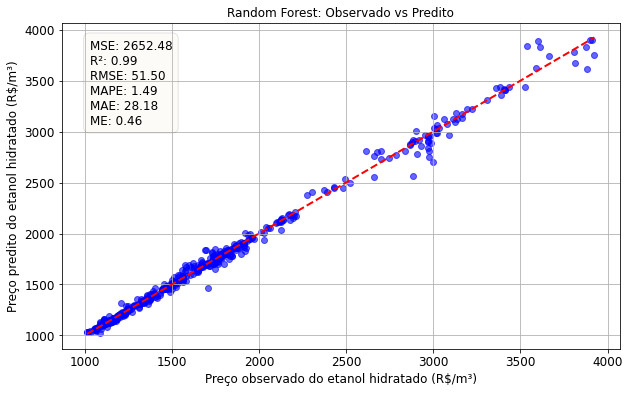

In [18]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Preço observado do etanol hidratado (R$/m³)', fontsize=12)
plt.ylabel('Preço predito do etanol hidratado (R$/m³)', fontsize=12)
plt.title('Random Forest: Observado vs Predito', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best_rf:.2f}\nR²: {r2_best_rf:.2f}\nRMSE: {rmse_best_rf:.2f}\nMAPE: {mape_best_rf:.2f}\nMAE: {mae_best_rf:.2f}\nME: {me_best_rf:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Suport Vector Machine

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [20]:
# Train the SVM model
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
print(svr.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [21]:
# Predictions
y_pred = svr.predict(X_test)

# Evaluate model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    me = np.mean(y_test - y_pred)
    return mse, rmse, mae, mape, r2, me

mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 354803.8667805722
R-squared (R²): 0.17165357906586842
Root Mean Squared Error (RMSE): 595.6541503091977
Mean Absolute Percentage Error (MAPE): 18.85780286076407
Mean Absolute Error (MAE): 379.83201132442963
Mean Error (ME): 173.49436747483367


In [22]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params_svr = grid_search.best_params_



Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [23]:
best_params_svr

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [24]:
# Train the model with best parameters
best_svr = SVR(**best_params_svr)
best_svr.fit(X_train, y_train)

# Predictions with the best model
y_pred_best = best_svr.predict(X_test)

# Evaluate the optimized model performance
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best)

# Combine metrics into a DataFrame
metrics_df_svm = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_svm)


  Métricas  Sem otimização  Com otimização
0      MSE   354803.866781     9923.731286
1     RMSE      595.654150       99.617927
2      MAE      379.832011       65.866732
3     MAPE       18.857803        3.619708
4       ME      173.494367        2.337076
5       R2        0.171654        0.976831


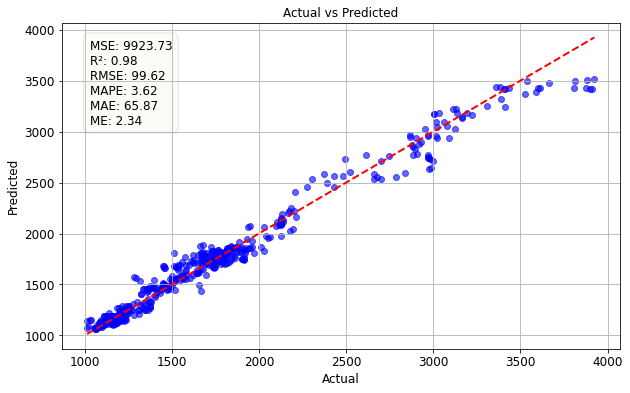

In [26]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2f}\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# AdaBoost

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [28]:
# Treina o modelo AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

print(ada.get_params())

{'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}


In [29]:
# Previsões
y_pred = ada.predict(X_test)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 16084.167741493844
R-squared (R²): 0.9624489357929957
Root Mean Squared Error (RMSE): 126.82337222095083
Mean Absolute Percentage Error (MAPE): 6.145918261918926
Mean Absolute Error (MAE): 104.13260360377323
Mean Error (ME): -10.26042827558014


In [35]:

# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [10, 25,50, 100, 200,300,400],
    'learning_rate': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params_ada = grid_search.best_params_
best_params_ada

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'learning_rate': 1, 'n_estimators': 100}

In [36]:
# Treina o modelo com os melhores parâmetros
best_ada = AdaBoostRegressor(**best_params_ada)
best_ada.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best_ada = best_ada.predict(X_test)

# Avalia o desempenho do modelo otimizado
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best_ada)

# Combina as métricas em um DataFrame
metrics_df_ada = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_ada)


  Métricas  Sem otimização  Com otimização
0      MSE    16084.167741    16077.452592
1     RMSE      126.823372      126.796895
2      MAE      104.132604      105.090909
3     MAPE        6.145918        6.192073
4       ME      -10.260428       -6.982503
5       R2        0.962449        0.962465


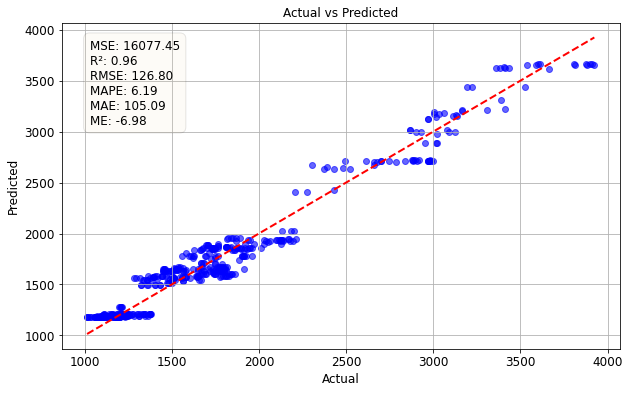

In [38]:

# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_ada, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2f}\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Gradient Boosting

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [40]:
# Treina o modelo Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

print(gbr.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [41]:

# Previsões
y_pred = gbr.predict(X_test)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 6071.22856116957
R-squared (R²): 0.9858257450941815
Root Mean Squared Error (RMSE): 77.91808879310099
Mean Absolute Percentage Error (MAPE): 3.147361675275482
Mean Absolute Error (MAE): 55.5978735721463
Mean Error (ME): -1.835870783942563


In [42]:

# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [25,50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params_gbm = grid_search.best_params_
best_params_gbm

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}

In [43]:

# Treina o modelo com os melhores parâmetros
best_gbr = GradientBoostingRegressor(**best_params_gbm)
best_gbr.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best = best_gbr.predict(X_test)

# Avalia o desempenho do modelo otimizado
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best)

# Combina as métricas em um DataFrame
metrics_df_gbm = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_gbm)


  Métricas  Sem otimização  Com otimização
0      MSE     6071.228561     3501.816252
1     RMSE       77.918089       59.176146
2      MAE       55.597874       32.389375
3     MAPE        3.147362        1.727553
4       ME       -1.835871        2.110274
5       R2        0.985826        0.991824


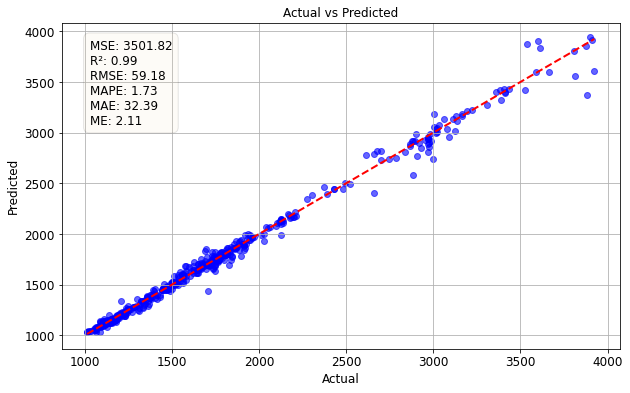

In [44]:

# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2f}\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# XGBoost

In [45]:
#!pip install xgboost
import xgboost as xgb

# Treina o modelo XGBoost
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)


{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [49]:
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [46]:
# Previsões
y_pred = xgbr.predict(X_test)

# Avaliação do modelo (utilizando a função evaluate_model definida anteriormente)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')


Mean Squared Error (MSE): 3139.8350032824396
R-squared (R²): 0.992669552587201
Root Mean Squared Error (RMSE): 56.034230638801844
Mean Absolute Percentage Error (MAPE): 1.6744543002905388
Mean Absolute Error (MAE): 31.347581557472154
Mean Error (ME): 1.3367228592976486


In [50]:
# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [None,25, 50, 100, 200, 300, 400],
    'learning_rate': [None,0.001,0.01, 0.1, 0.15, 0.2, 0.3],
    'max_depth': [None,1, 3, 4, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params_xgb = grid_search.best_params_
best_params_xgb


Fitting 5 folds for each of 294 candidates, totalling 1470 fits


{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 300}

In [51]:
# Treina o modelo com os melhores parâmetros
best_xgbr = xgb.XGBRegressor(**best_params_xgb)
best_xgbr.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best_xgb = best_xgbr.predict(X_test)

# Avalia o desempenho do modelo otimizado
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best_xgb)

# Combina as métricas em um DataFrame
metrics_df_xgbr = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_xgbr)


  Métricas  Sem otimização  Com otimização
0      MSE     3139.835003     3340.553603
1     RMSE       56.034231       57.797522
2      MAE       31.347582       35.336427
3     MAPE        1.674454        1.908556
4       ME        1.336723        0.685038
5       R2        0.992670        0.992201


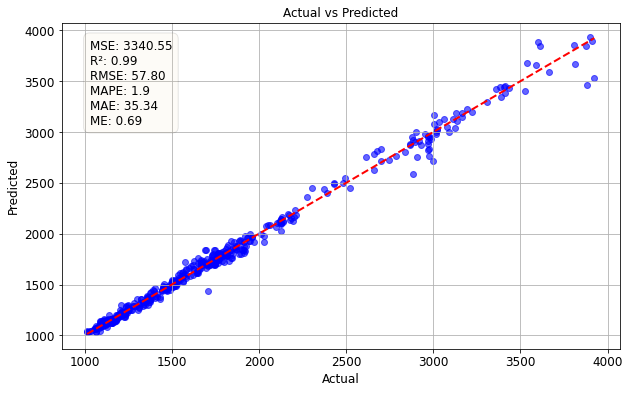

In [52]:
# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2}\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# LightGBM

In [53]:
#!pip install lightgbm
import lightgbm as lgb

# Treina o modelo LightGBM
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.get_params())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 10
[LightGBM] [Info] Start training from score 1744.734871
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [54]:
# Previsões
y_pred = lgbm.predict(X_test)

# Avaliação do modelo (utilizando a função evaluate_model definida anteriormente)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)


In [55]:

# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'num_leaves': [20, 31, 40]
}

grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params_lgbr = grid_search.best_params_
best_params_lgbr


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 10
[LightGBM] [Info] Start training from score 1744.734871


{'learning_rate': 0.1, 'n_estimators': 400, 'num_leaves': 40}

In [56]:
# Treina o modelo com os melhores parâmetros
best_lgbm = lgb.LGBMRegressor(**best_params_lgbr)
best_lgbm.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best = best_lgbm.predict(X_test)

# Avalia o desempenho do modelo otimizado
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best)

# Combina as métricas em um DataFrame
metrics_df_lgbr = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_lgbr)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 10
[LightGBM] [Info] Start training from score 1744.734871
  Métricas  Sem otimização  Com otimização
0      MSE     3344.784633     3119.433794
1     RMSE       57.834113       55.851892
2      MAE       34.823568       33.392817
3     MAPE        1.890318        1.800300
4       ME        1.179538        2.182904
5       R2        0.992191        0.992717


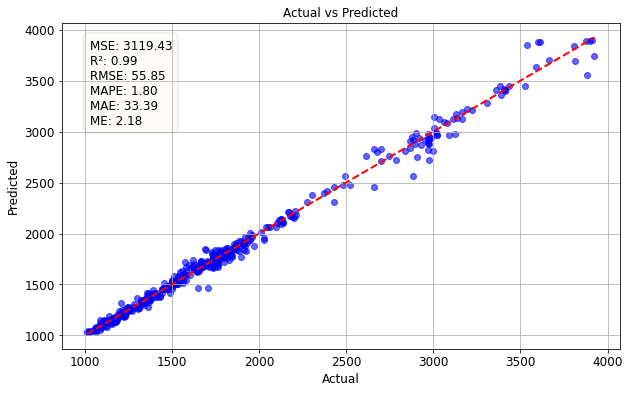

In [59]:
# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2f}\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Neural Network

In [60]:
#!pip install numpy
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [61]:
from scikeras.wrappers import KerasRegressor
def create_model(neurons=1, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Cria o KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

model.fit(X_train, y_train)
print(model.get_params())

C:\Users\rafae\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\rafae\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'model': None, 'build_fn': <function create_model at 0x00000113D90FEF70>, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': None, 'metrics': None, 'batch_size': 10, 'validation_batch_size': None, 'verbose': 0, 'callbacks': None, 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 100}


In [62]:
# Previsões
y_pred = model.predict(X_test)
y_pred = np.ravel(y_pred)
# Avaliação do modelo (utilizando a função evaluate_model definida anteriormente)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 291115.08354573534
R-squared (R²): 0.3203452382772771
Root Mean Squared Error (RMSE): 539.5508164628568
Mean Absolute Percentage Error (MAPE): 25.35225980739884
Mean Absolute Error (MAE): 425.08615070003094
Mean Error (ME): 63.44657526299505


In [63]:
# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'model__neurons': [5, 10, 20],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [10, 20, 30],
    'epochs': [50, 100, 150]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\rafae\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\rafae\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'batch_size': 10,
 'epochs': 150,
 'model__learning_rate': 0.001,
 'model__neurons': 20}

In [74]:
# Treina o modelo com os melhores parâmetros
best_neurons = best_params['model__neurons']
best_learning_rate = best_params['model__learning_rate']
best_epochs = best_params['epochs']
best_batch_size = best_params['batch_size']

best_model = create_model(neurons=best_neurons, learning_rate=best_learning_rate)
best_model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size, verbose=0)




C:\Users\rafae\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
# Previsões com o melhor modelo
y_pred_best = best_model.predict(X_test)
# Converting y_pred to a 1-dimensional array
y_pred_best = np.ravel(y_pred_best)
print(y_pred_best)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[1145.2402  1304.6914  1674.3336  1394.9805  3091.09    1246.6093
 1877.7926  2461.6282  1265.0895  1924.1528  1700.0339  1765.3418
 1272.2614  2907.108   2602.4214  1595.0747  1257.2595  1281.5203
 1682.349    954.85986 1582.3743  1700.0391  1867.3811  1674.3325
 2927.2556  1525.6052  1427.406   1240.5713  1413.4392  1247.3844
 1082.0837  2646.4312  1217.9922  1790.2861  1815.2991  1660.7928
 1512.9928  1977.2263  1115.7085  1248.123   1218.6069  2892.1467
 1040.7899  1565.183   1771.9203  1928.6243  2862.9365  1321.4777
 1581.8193  1228.5399  1132.9094  1186.9011  1158.6416  1260.3928
 1470.4756  1268.9719  3629.969   1255.863    925.02466  995.44
 1721.8079  2043.4395  1890.2495  1099.8069  1712.2356  1719.1287
 3094.0215  1943.4193  1352.8676  1079.2616  2567.3154  1006.50793
 1609.5095  3698.4587  1343.728   1706.2844  1516.0211  1349.1967
 1184.7999  1712.3826  2950.7441  3432.094   1580.0197  1309.1677
 1290.364   1529.7837  1570.2023  1794

In [76]:
# Evaluate model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    me = np.mean(y_test - y_pred)
    return mse, rmse, mae, mape, r2, me

# Avaliação do desempenho do modelo
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best)

# Combina as métricas em um DataFrame
metrics_df_nnet = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_nnet)


  Métricas  Sem otimização  Com otimização
0      MSE   291115.083546    40475.762296
1     RMSE      539.550816      201.185890
2      MAE      425.086151      153.121729
3     MAPE       25.352260        9.168988
4       ME       63.446575        0.325690
5       R2        0.320345        0.905503


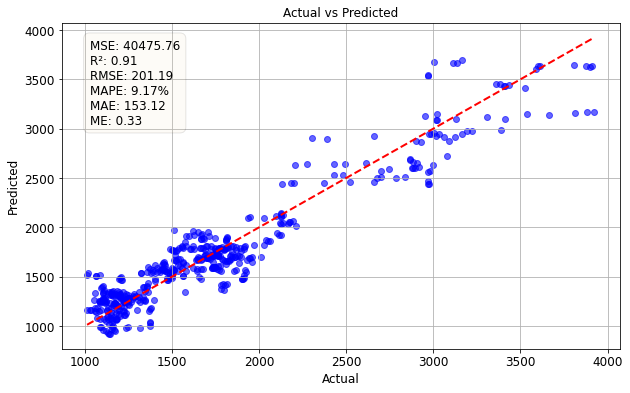

In [77]:


# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2f}%\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Avaliação conjunta

In [78]:
metrics_df_nnet['Modelo']='Rede Neural'
metrics_df_lgbr['Modelo'] = 'LightGBM'
metrics_df_xgbr['Modelo'] = 'XGBoost'
metrics_df_gbm['Modelo'] = 'Gradient Boosting'
metrics_df_ada['Modelo'] = 'AdaBoost'
metrics_df_svm = metrics_df_svm.rename(columns={'Métrica':'Métricas'})
metrics_df_svm['Modelo'] = 'SVM'
metrics_df_rf = metrics_df_rf.rename(columns={'Métrica':'Métricas'})
metrics_df_rf['Modelo']='Random Forest'

In [79]:
# Concatenate DataFrames
concatenated_df = pd.concat([metrics_df_nnet, metrics_df_lgbr, metrics_df_xgbr, metrics_df_gbm, metrics_df_ada, metrics_df_svm, metrics_df_rf], ignore_index=True)

# Print the concatenated DataFrame
print(concatenated_df)

   Métricas  Sem otimização  Com otimização             Modelo
0       MSE   291115.083546    40475.762296        Rede Neural
1      RMSE      539.550816      201.185890        Rede Neural
2       MAE      425.086151      153.121729        Rede Neural
3      MAPE       25.352260        9.168988        Rede Neural
4        ME       63.446575        0.325690        Rede Neural
5        R2        0.320345        0.905503        Rede Neural
6       MSE     3344.784633     3119.433794           LightGBM
7      RMSE       57.834113       55.851892           LightGBM
8       MAE       34.823568       33.392817           LightGBM
9      MAPE        1.890318        1.800300           LightGBM
10       ME        1.179538        2.182904           LightGBM
11       R2        0.992191        0.992717           LightGBM
12      MSE     3139.835003     3340.553603            XGBoost
13     RMSE       56.034231       57.797522            XGBoost
14      MAE       31.347582       35.336427            

In [80]:
# Export to Excel
concatenated_df.to_excel('metrics_etanol.xlsx', index=False)

print("DataFrame exported to Excel successfully!")

DataFrame exported to Excel successfully!


In [95]:
#!pip install easy_mpl
import numpy as np
from easy_mpl import taylor_plot
from easy_mpl.utils import version_info

In [82]:
# taylor plot
observations =  y_test

### Modelos
# RNA
rna = best_model.predict(X_test)
rna = np.ravel(y_pred_best)
rf = best_rf.predict(X_test)
lgbm = best_lgbm.predict(X_test)
xgb = best_xgbr.predict(X_test)
gb = best_gbr.predict(X_test)
ada = best_ada.predict(X_test)
svr = best_svr.predict(X_test)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


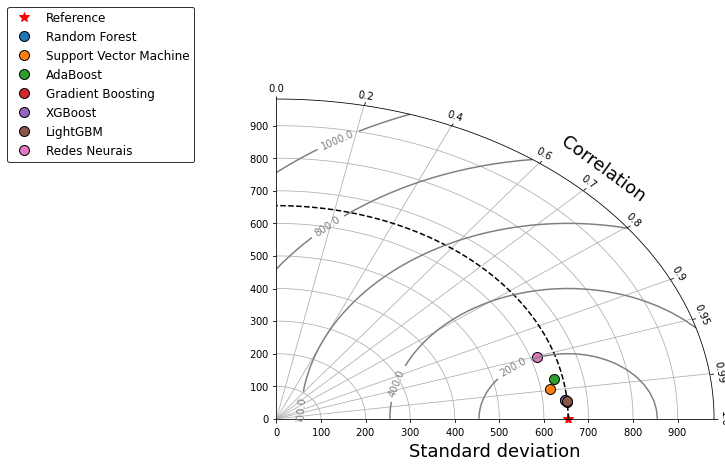

In [96]:
simulations =  {"Random Forest": rf,
                "Support Vector Machine":svr,
                "AdaBoost": ada,
                "Gradient Boosting":gb,
                "XGBoost": xgb,
                "LightGBM":lgbm,
                "Redes Neurais": rna}
_ = taylor_plot(
    observations=observations,
    simulations=simulations,
#    marker_kws={'markersize': 10, 'markeredgewidth': 1.5,
#                            'markeredgecolor': 'black', 'lw': 0.0},
    leg_kws={'facecolor': 'white',
                'edgecolor': 'black','bbox_to_anchor':(0, 1.1),
                'fontsize': 12, 'labelspacing': 0.5},
                marker_kws = {'ms':'10', 'markeredgecolor': 'k', 'lw': 0.0})

In [84]:
import numpy as np
del taylor_plot
# Supondo que y_test e rna sejam arrays do numpy
correlacao = np.corrcoef(y_test, rna)[0, 1]
print(correlacao**2)

0.905641656035807


In [85]:
ensemble = pd.DataFrame({'rf':rf,'xgb': xgb, 'lgbm':lgbm})
ensemble['media']=ensemble.mean(numeric_only=True, axis=1)
ensemble['observado']=y_test.values
ensemble
# Avalia o desempenho do modelo otimizado
mse_ens, rmse_ens, mae_ens, mape_ens, r2_ens, me_ens = evaluate_model(ensemble['observado'], ensemble['media'])

print(f'Mean Squared Error (MSE): {mse_ens}')
print(f'R-squared (R²): {r2_ens}')
print(f'Root Mean Squared Error (RMSE): {rmse_ens}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ens}')
print(f'Mean Absolute Error (MAE): {mae_ens}')
print(f'Mean Error (ME): {me_ens}')

Mean Squared Error (MSE): 2785.9416857771857
R-squared (R²): 0.9934957731850991
Root Mean Squared Error (RMSE): 52.78202047835215
Mean Absolute Percentage Error (MAPE): 1.651047446543895
Mean Absolute Error (MAE): 30.778676883409876
Mean Error (ME): 1.108824230500634


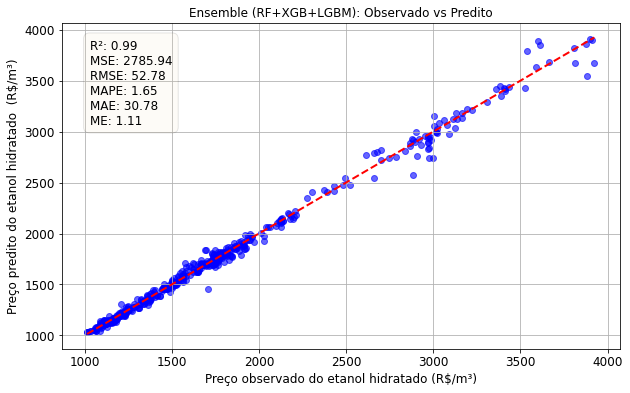

In [87]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(ensemble['observado'], ensemble['media'], color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Preço observado do etanol hidratado (R$/m³)', fontsize=12)
plt.ylabel('Preço predito do etanol hidratado  (R$/m³)', fontsize=12)
plt.title('Ensemble (RF+XGB+LGBM): Observado vs Predito', fontsize=12)
plt.text(0.05, 0.95, f'R²: {r2_ens:.2f}\nMSE: {mse_ens:.2f}\nRMSE: {rmse_ens:.2f}\nMAPE: {mape_ens:.2f}\nMAE: {mae_ens:.2f}\nME: {me_ens:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [89]:
#Série temporal
rf_serie = best_rf.predict(X_etanol)
lgbm_serie = best_lgbm.predict(X_etanol)
xgb_serie = best_xgbr.predict(X_etanol)


In [91]:
dt_serie = pd.DataFrame({'rf':rf_serie,'xgb': xgb_serie, 'lgbm':lgbm_serie})
dt_serie['ensemble']=dt_serie.mean(numeric_only=True, axis=1)
dt_serie['observado']=y_etanol.values
dt_serie['data']=dados['data']
dt_serie

,rf,xgb,lgbm,ensemble,observado,data
0,1221.085000,1217.753784,1205.035657,1214.624814,1231.5,2012-01-03
1,1228.410000,1231.763672,1225.923032,1228.698901,1239.5,2012-01-04
2,1253.258333,1253.258301,1258.713087,1255.076574,1248.5,2012-01-05
3,1259.861667,1255.172729,1268.829699,1261.288032,1259.0,2012-01-06
4,1263.498333,1255.172729,1265.225985,1261.299016,1265.0,2012-01-09
...,...,...,...,...,...,...
2516,2957.158333,2920.728760,2939.385499,2939.090864,2968.0,2022-12-21
2517,2952.678333,2939.973145,2947.825265,2946.825581,2969.5,2022-12-22
2518,2954.476667,2947.305176,2924.281245,2942.021029,2971.5,2022-12-23
2519,2809.515000,2837.908691,2882.417714,2843.280468,2973.0,2022-12-27


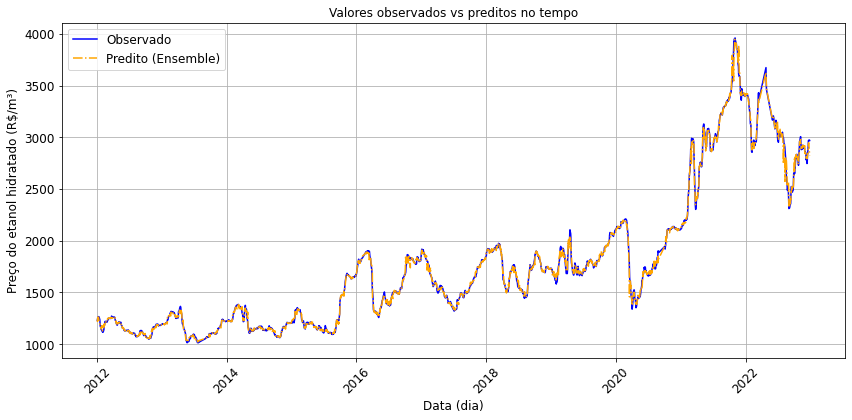

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
# Ensure 'data' is a datetime or numeric column for proper plotting
if not pd.api.types.is_numeric_dtype(dt_serie['data']):
    try:
        # Attempt to convert to datetime if it's string-like
        dt_serie['data'] = pd.to_datetime(dt_serie['data'])
    except:
        pass  # Handle potential conversion errors gracefully

# Create the plot with clear labels and styling
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.rcParams.update({'font.size': 12})
plt.plot(dt_serie['data'], dt_serie['observado'], label='Observado', color='b')
plt.plot(dt_serie['data'], dt_serie['ensemble'], label='Predito (Ensemble)', linestyle='-.', color='orange')
plt.xlabel('Data (dia)', fontsize=12)
plt.ylabel('Preço do etanol hidratado (R$/m³)', fontsize=12)
plt.title('Valores observados vs preditos no tempo', fontsize=12)

# Add the legend with the custom box
plt.legend()

plt.grid(True)  # Add a grid for better readability

# Customize plot aesthetics (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability with many data points

# Show the plot
plt.tight_layout()
plt.show()
